# 장애인콜택시 대기시간 예측
## 단계3. 모델링

## 0.미션

* 1.시계열 데이터에 맞는 전처리
    * 데이터가 2015 ~ 2022년까지 데이터 입니다.
    * 이 중 2022년 10월 ~ 2022년 12월까지(3개월)의 데이터는 성능 검증용으로 사용합니다.
    * 나머지 데이터를 이용하여 학습 및 튜닝을 수행합니다.
    * 이를 위한 데이터 전처리를 수행하시오.
* 2.모델 최적화
    * 머신러닝 
        * 알고리즘 중 3가지 이상을 선정하여 모델링을 수행합니다.
        * 각각 알고리즘에 맞는 튜닝 방법으로 최적의 모델을 만듭니다.
    * 딥러닝
        * 모델 구조를 2가지 이상을 생성하고 모델링을 수행합니다.
        * epochs, learning_rate 등을 조절하며 성능을 튜닝합니다.
    * 성능 평가
        * 시계열 그래프로 모델의 실제값과 예측값을 시각화하여 비교합니다.
        * 성능 지표 (MAE, MAPE) 를 사용해 가장 성능이 높은 모델을 선정합니다.
        * 성능 가이드
            * MAE : 4 ~ 6
            * MAPE : 0.09~0.14

## 1.환경설정

* 세부 요구사항
    - 경로 설정 : 다음의 두가지 방법 중 하나를 선택하여 폴더를 준비하고 데이터를 로딩하시오.
        * 1) 로컬 수행(Ananconda)
            * 제공된 압축파일을 다운받아 압축을 풀고
            * anaconda의 root directory(보통 C:/Users/< ID > 에 project 폴더를 만들고, 복사해 넣습니다.
        * 2) 구글콜랩
            * 구글 드라이브 바로 밑에 project 폴더를 만들고, 
            * 데이터 파일을 복사해 넣습니다.
    - 라이브러리 설치 및 로딩
        * requirements.txt 파일로 부터 라이브러리 설치
    - 기본적으로 필요한 라이브러리를 import 하도록 코드가 작성되어 있습니다. 
        * 필요하다고 판단되는 라이브러리를 추가하세요.

### (1) 경로 설정

#### 1) 로컬 수행(Anaconda)
* project 폴더에 필요한 파일들을 넣고, 본 파일을 열었다면, 별도 경로 지정이 필요하지 않습니다.

In [1]:
path = ''

#### 2) 구글 콜랩 수행

* 구글 드라이브 연결

from google.colab import drive
drive.mount('/content/drive')

path = '/content/drive/MyDrive/project/'

### (2) 라이브러리 설치 및 불러오기

#### 1) 설치

* requirements.txt 파일을 아래 위치에 두고 다음 코드를 실행하시오.
    * 로컬 : 다음 코드셀 실행
    * 구글콜랩 : requirements.txt 파일을 왼쪽 [파일]탭에 복사해 넣고 다음 코드셀 실행

!pip install -r requirements.txt

#### 2) 라이브러리 로딩

* **세부 요구사항**
    - 기본적으로 필요한 라이브러리를 import 하도록 코드가 작성되어 있습니다.
    - 필요하다고 판단되는 라이브러리를 추가하세요.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import joblib

### (3) 데이터 불러오기
* 주어진 데이터셋
    * [2.탐색적 데이터분석] 단계에서 저장한 파일 : data2.pkl

In [34]:
file1 = 'data2.pkl'

In [35]:
df = joblib.load(file1)

## 2.데이터 준비
* **세부요구사항**
    * NaN에 대한 조치를 수행하시오.
        * rolling 혹은 shift로 발생된 초기 행의 NaN은 삭제해도 무방합니다.
    * 가변수화 : 범주형에 대해서 가변수화를 수행합니다.
    * 데이터분할
        * 시계열 데이터 특성에 맞게 분할합니다.
        * 마지막 91일(3개월) 데이터를 검증셋으로 사용합니다.

### (1) NA 조치

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2921 entries, 0 to 2920
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              2921 non-null   datetime64[ns]
 1   car_cnt           2921 non-null   int64         
 2   request_cnt       2921 non-null   int64         
 3   ride_cnt          2921 non-null   int64         
 4   waiting_time      2921 non-null   float64       
 5   fare              2921 non-null   int64         
 6   distance          2921 non-null   int64         
 7   weekday           2921 non-null   int64         
 8   month             2921 non-null   int64         
 9   week              2921 non-null   UInt32        
 10  year              2921 non-null   int64         
 11  target            2921 non-null   float64       
 12  temp_max          2921 non-null   float64       
 13  temp_min          2921 non-null   float64       
 14  rain(mm)          2921 n

### (2) 가변수화

In [37]:
dumm_cols = ['weekday', 'month', 'year', 'holiday', 'season', 'week']
df = pd.get_dummies(df, columns=dumm_cols, drop_first=True)

C:\Users\SIK\AppData\Local\Temp\ipykernel_29308\2862566096.py:2: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  df = pd.get_dummies(df, columns=dumm_cols, drop_first=True)


In [38]:
df.head()

,Date,car_cnt,request_cnt,ride_cnt,waiting_time,fare,distance,target,temp_max,temp_min,...,week_44,week_45,week_46,week_47,week_48,week_49,week_50,week_51,week_52,week_53
0,2015-01-01,213,1023,924,23.2,2427,10764,17.2,-1.6,-1.6,...,0,0,0,0,0,0,0,0,0,0
1,2015-01-02,420,3158,2839,17.2,2216,8611,26.2,-4.3,-9.8,...,0,0,0,0,0,0,0,0,0,0
2,2015-01-03,209,1648,1514,26.2,2377,10198,24.5,-2.0,-8.9,...,0,0,0,0,0,0,0,0,0,0
3,2015-01-04,196,1646,1526,24.5,2431,10955,26.2,2.4,-9.2,...,0,0,0,0,0,0,0,0,0,0
4,2015-01-05,421,4250,3730,26.2,2214,8663,23.6,8.2,0.2,...,0,0,0,0,0,0,0,0,0,0


### (3) 데이터분할
* **세부요구사항**
    * 마지막 91일 간의 데이터를 검증 셋으로 만듭니다. (2022-10-01 ~ )
    * 이 기간의 날짜 리스트를 별도로 저장하여, 모델 검증시 시각화할 때 활용합니다.

#### 1) x, y 나누기

In [39]:
df.sort_values(by=['Date'], inplace=True)

In [40]:
x = df.drop(['Date', 'target'], axis=1)
y = df['target']

In [41]:
x.columns

Index(['car_cnt', 'request_cnt', 'ride_cnt', 'waiting_time', 'fare',
       'distance', 'temp_max', 'temp_min', 'rain(mm)', 'humidity_max(%)',
       'humidity_min(%)', 'sunshine(MJ/m2)', 'ave_waiting_time', 'ride_rate',
       'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5',
       'weekday_6', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6',
       'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12',
       'year_2016', 'year_2017', 'year_2018', 'year_2019', 'year_2020',
       'year_2021', 'year_2022', 'holiday_1', 'season_Spring', 'season_Summer',
       'season_Winter', 'week_2', 'week_3', 'week_4', 'week_5', 'week_6',
       'week_7', 'week_8', 'week_9', 'week_10', 'week_11', 'week_12',
       'week_13', 'week_14', 'week_15', 'week_16', 'week_17', 'week_18',
       'week_19', 'week_20', 'week_21', 'week_22', 'week_23', 'week_24',
       'week_25', 'week_26', 'week_27', 'week_28', 'week_29', 'week_30',
       'week_31', 'week_32', 'week_33', '

#### 2) train : validation 나누기
* 힌트 : train_test_split(  ,   ,  test_size = 91, shuffle = False) 

In [42]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=91, shuffle=False)

x_train.shape, x_val.shape, y_train.shape, y_val.shape

((2830, 94), (91, 94), (2830,), (91,))

### (4) Scaling
* KNN, SVM 알고리즘 및 DL을 적용하기 위해서는 스케일링을 해야 합니다.

In [43]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

## 3.모델링
* **세부요구사항**
    * 머신러닝 알고리즘 중 3가지 이상을 사용하여 모델을 만들고 튜닝을 수행합니다.
    * 딥러닝 모델 구조 2가지 이상을 설계하고 모델을 생성합니다.
    * 성능 측정은 MAE, MAPE로 수행합니다.
    * 모델링 후 실제값과 예측값을 시각화(라인차트)하여 분석합니다.

### (1) 머신러닝

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

#### 1) 모델1

In [44]:
from sklearn.linear_model import LinearRegression

model_lr = LinearRegression()
model_lr.fit(x_train, y_train)
pred_lr = model_lr.predict(x_val)
print(f'MAE : {mean_absolute_error(y_val, pred_lr)}, MAPE : {mean_absolute_percentage_error(y_val, pred_lr)}')

MAE : 4.449774639423077, MAPE : 0.11076577822732647


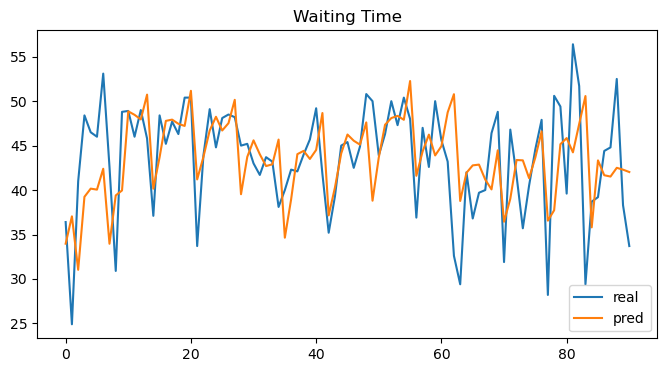

In [63]:
plt.figure(figsize=(8, 4))
plt.plot(y_val.values, label='real')
plt.plot(pred_lr, label='pred')
plt.legend()
plt.title('Waiting Time')
plt.show()

#### 2) 모델2

In [54]:
from sklearn.ensemble import RandomForestRegressor

rfg = RandomForestRegressor()
rfg.fit(x_train, y_train)
pred_rfg = rfg.predict(x_val)
print(f'MAE : {mean_absolute_error(y_val, pred_rfg)}, MAPE : {mean_absolute_percentage_error(y_val, pred_rfg)}')

MAE : 4.641593406593408, MAPE : 0.1140282496044292


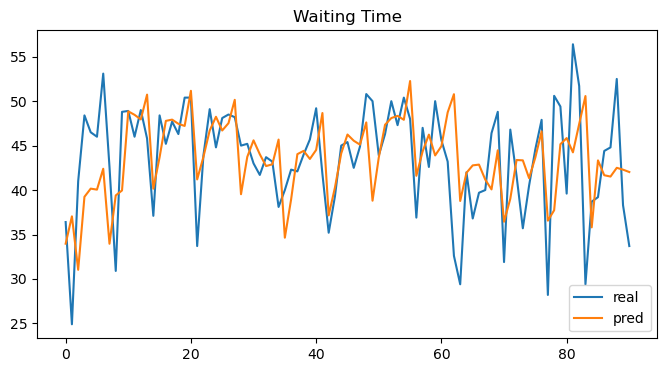

In [64]:
plt.figure(figsize=(8, 4))
plt.plot(y_val.values, label='real')
plt.plot(pred_lr, label='pred')
plt.legend()
plt.title('Waiting Time')
plt.show()

#### 3) 모델3

In [57]:
from lightgbm import LGBMRegressor

lgbr = LGBMRegressor()
lgbr.fit(x_train, y_train)
pred_lgbr = lgbr.predict(x_val)
print(f'MAE : {mean_absolute_error(y_val, pred_lgbr)}, MAPE : {mean_absolute_percentage_error(y_val, pred_lgbr)}')

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000535 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3233
[LightGBM] [Info] Number of data points in the train set: 2830, number of used features: 93
[LightGBM] [Info] Start training from score 40.208127
MAE : 4.470612398666523, MAPE : 0.10998665805622407


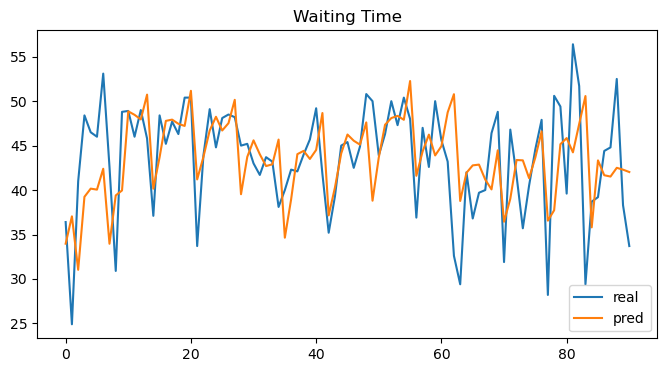

In [65]:
plt.figure(figsize=(8, 4))
plt.plot(y_val.values, label='real')
plt.plot(pred_lr, label='pred')
plt.legend()
plt.title('Waiting Time')
plt.show()

### (2) 딥러닝

In [20]:
import tensorflow as tf

#### 1) 모델1

In [61]:
x_train.shape

(2830, 94)

In [72]:
import numpy as np
import tensorflow as tf

np.random.seed(0)
tf.random.set_seed(0)

X = tf.keras.Input(shape=[x_train.shape[1]])

H = tf.keras.layers.Dense(64)(X)
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Activation('swish')(H)

H = tf.keras.layers.Dropout(0.6)(H)
H = tf.keras.layers.Dense(128)(H)
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Activation('swish')(H)

H = tf.keras.layers.Dropout(0.5)(H)
H = tf.keras.layers.Dense(64)(H)
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Activation('swish')(H)

H = tf.keras.layers.Dropout(0.5)(H)
H = tf.keras.layers.Dense(32)(H)
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Activation('swish')(H)

H = tf.keras.layers.Dropout(0.3)(H)
Y = tf.keras.layers.Dense(1)(H)

model = tf.keras.Model(X, Y)
model.compile(loss='mae')
# model.summary()

In [73]:
es = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

history = model.fit(x_train, 
                    y_train, 
                    epochs=200,  
                    batch_size=32, 
                    validation_data=(x_val,y_val),
                    callbacks=[es]
                    )

Epoch 1/200
89/89 [==============================] - 2s 6ms/step - loss: 39.1949 - val_loss: 43.1853
Epoch 2/200
89/89 [==============================] - 0s 4ms/step - loss: 37.9002 - val_loss: 42.7207
Epoch 3/200
89/89 [==============================] - 0s 3ms/step - loss: 36.3483 - val_loss: 41.9344
Epoch 4/200
89/89 [==============================] - 0s 3ms/step - loss: 34.3008 - val_loss: 40.5026
Epoch 5/200
89/89 [==============================] - 0s 5ms/step - loss: 31.8753 - val_loss: 38.5547
Epoch 6/200
89/89 [==============================] - 0s 3ms/step - loss: 28.8576 - val_loss: 36.3035
Epoch 7/200
89/89 [==============================] - 0s 3ms/step - loss: 25.5151 - val_loss: 33.2662
Epoch 8/200
89/89 [==============================] - 0s 3ms/step - loss: 21.7240 - val_loss: 29.2035
Epoch 9/200
89/89 [==============================] - 0s 4ms/step - loss: 18.2745 - val_loss: 25.1663
Epoch 10/200
89/89 [==============================] - 0s 4ms/step - loss: 15.0997 - val_los

In [89]:
dl = model.predict(x_val)

3/3 [==============================] - 0s 3ms/step


In [79]:
model2.evaluate(x_val, y_val)

3/3 [==============================] - 0s 5ms/step - loss: 4.8896


4.889565467834473

## 4.모델 비교
* **세부요구사항**
    * 모델링 단계에서 생성한 모든 모델의 성능을 하나로 모아서 비교합니다.
    * 가장 성능이 높은 모델을 선정합니다.

In [94]:
print('lr')
print(f'MAE : {mean_absolute_error(y_val, pred_lr)}, \
MAPE : {mean_absolute_percentage_error(y_val, pred_lr)}')
print('rfr')
print(f'MAE : {mean_absolute_error(y_val, pred_rfg)}, \
MAPE : {mean_absolute_percentage_error(y_val, pred_rfg)}')
print('lgbr')
print(f'MAE : {mean_absolute_error(y_val, pred_lgbr)}, \
MAPE : {mean_absolute_percentage_error(y_val, pred_lgbr)}')
print('dl')
print(f'MAE : {mean_absolute_error(y_val, dl.ravel())}, \
MAPE : {mean_absolute_percentage_error(y_val, dl.ravel())}')

n_pred = pred_lr * 0.3  + pred_lgbr * 0.3 + dl.ravel() * 0.4
print('ensemble')
print(f'MAE : {mean_absolute_error(y_val, n_pred)}, \
MAPE : {mean_absolute_percentage_error(y_val, n_pred)}')

lr
MAE : 4.449774639423077, MAPE : 0.11076577822732647
rfr
MAE : 4.641593406593408, MAPE : 0.1140282496044292
lgbr
MAE : 4.470612398666523, MAPE : 0.10998665805622407
dl
MAE : 4.36943115402054, MAPE : 0.1086053210172846
ensemble
MAE : 4.225450847941776, MAPE : 0.10491485903279031
